<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Erick Machuca, Carlos Moreno.

**Fecha:** 15 de marzo del 2025.

**Expediente** : 742602, .
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [Repo](https://github.com/MPST-2025-I/tarea-4-ejercicio-cnn-tarea-4-1)

# Tarea 4: Clase 13

## Enunciado de tarea ejercicio 1
> 1. Buscar un artículo científico donde se apliquen las CNN. Hacer una discusión y mostrar los resultados en el notebook de solución de la tarea. (Sólo se va solicitar un artículo por pareja)
> 2. Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.
https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

### Ejercicio 1:
Buscar un artículo científico donde se apliquen las CNN. Hacer una discusión y mostrar los resultados en el notebook de solución de la tarea. (Sólo se va solicitar un artículo por pareja)

Laptev, N., Yosinski, J., Erran Li, L., & Smyl, S. (2017). Time-series Extreme Event Forecasting with Neural Networks at Uber. NA. https://www.cs.columbia.edu/~lierranli/publications/TSW2017_paper.pdf

En este paper, se usan las redes neuronales convolucionales para comparar el rendimiento con los árboles de decisión y modelos de series de tiempo tradicionales. Aplican LSTM para capturar las dependencias a largo plazo en la serie, y usan una función de pérdida especial para manejar el desequilibrio de los eventos extremos. Demuestra que si dió mejores resultados que otros modelos tradicionales como ARIMA o el random forest. El modelo fue desplegado en Uber para así poder predecir los eventos extremos y alocar los recursos necesarios a ellos, siendo más eficientes y efectivos.

### Ejercicio 2:
Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

+ https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. El objetivo en este ejercicio es que usen una CNN para predecir el precio de las casas. Este dataset, ya tiene todas las características a ser usadas por el modelo, así que no tienen que realizar alguna preparación especial de los datos. Sólo buscar la mejor estructura de la CNN que les de mejores resultados.
+ https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

Código de solución estudiante Erick Machuca

#### Precio de casas

In [2]:
# Código de solución estudiante 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("data/Housing Prices Dataset.csv")

In [4]:
df.shape

(545, 13)

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
#Visualizar todo junto
def reporte(datos):
    dtyp = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(datos.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(datos.max(), columns=['Max'])
    minimo = pd.DataFrame(datos.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)

reporte(datos=df)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
price,int64,0,219,13300000,1750000
area,int64,0,284,16200,1650
bedrooms,int64,0,6,6,1
bathrooms,int64,0,4,4,1
stories,int64,0,4,4,1
mainroad,object,0,2,yes,no
guestroom,object,0,2,yes,no
basement,object,0,2,yes,no
hotwaterheating,object,0,2,yes,no
airconditioning,object,0,2,yes,no


El dataset no tiene ningún dato nulo, hay 7 variables de tipo object y 6 numéricas. Las variables categóricas tienen granularidad baja, con el máximo siendo 3 valores únicos en la de ´furnishingstatus´.

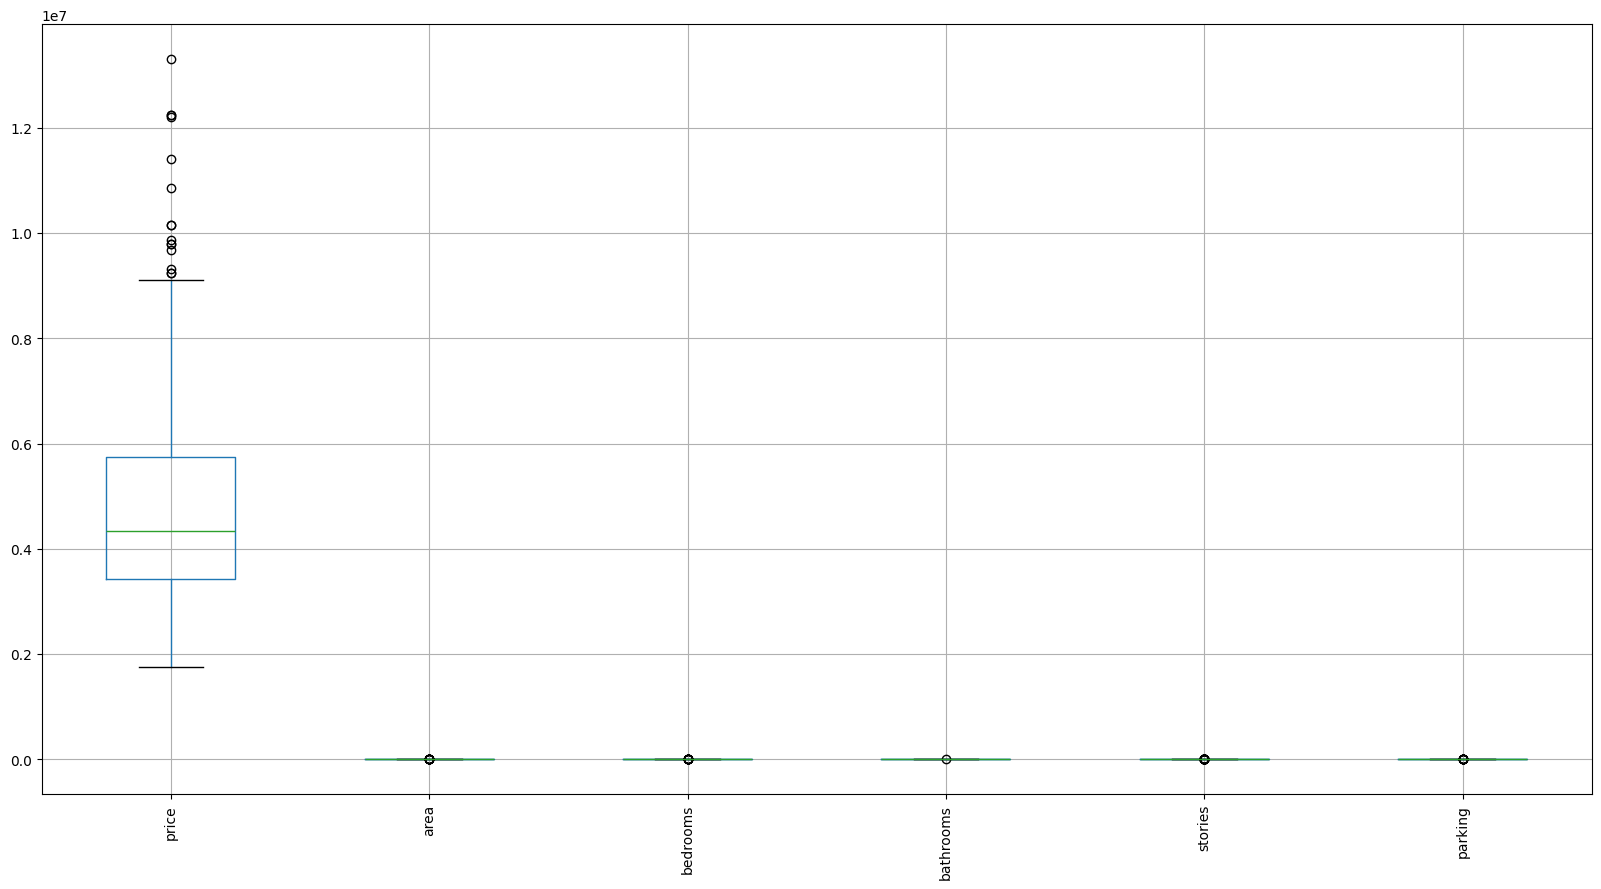

In [7]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show() # Hay datos atípicos en nuestra variable objetivo

In [8]:
def print_outliers_count(df):
    print("Valores atípicos por columna:")
    total_outliers = 0
    
    numeric_columns = df.select_dtypes(include=np.number).columns
    
    for column in numeric_columns:
        data = df[column].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total_outliers += outliers_count
        
        print(f"  {column}: {outliers_count}")
    
    print(f"Total de valores atípicos: {total_outliers}")

print_outliers_count(df)

Valores atípicos por columna:
  price: 15
  area: 12
  bedrooms: 12
  bathrooms: 1
  stories: 41
  parking: 12
Total de valores atípicos: 93


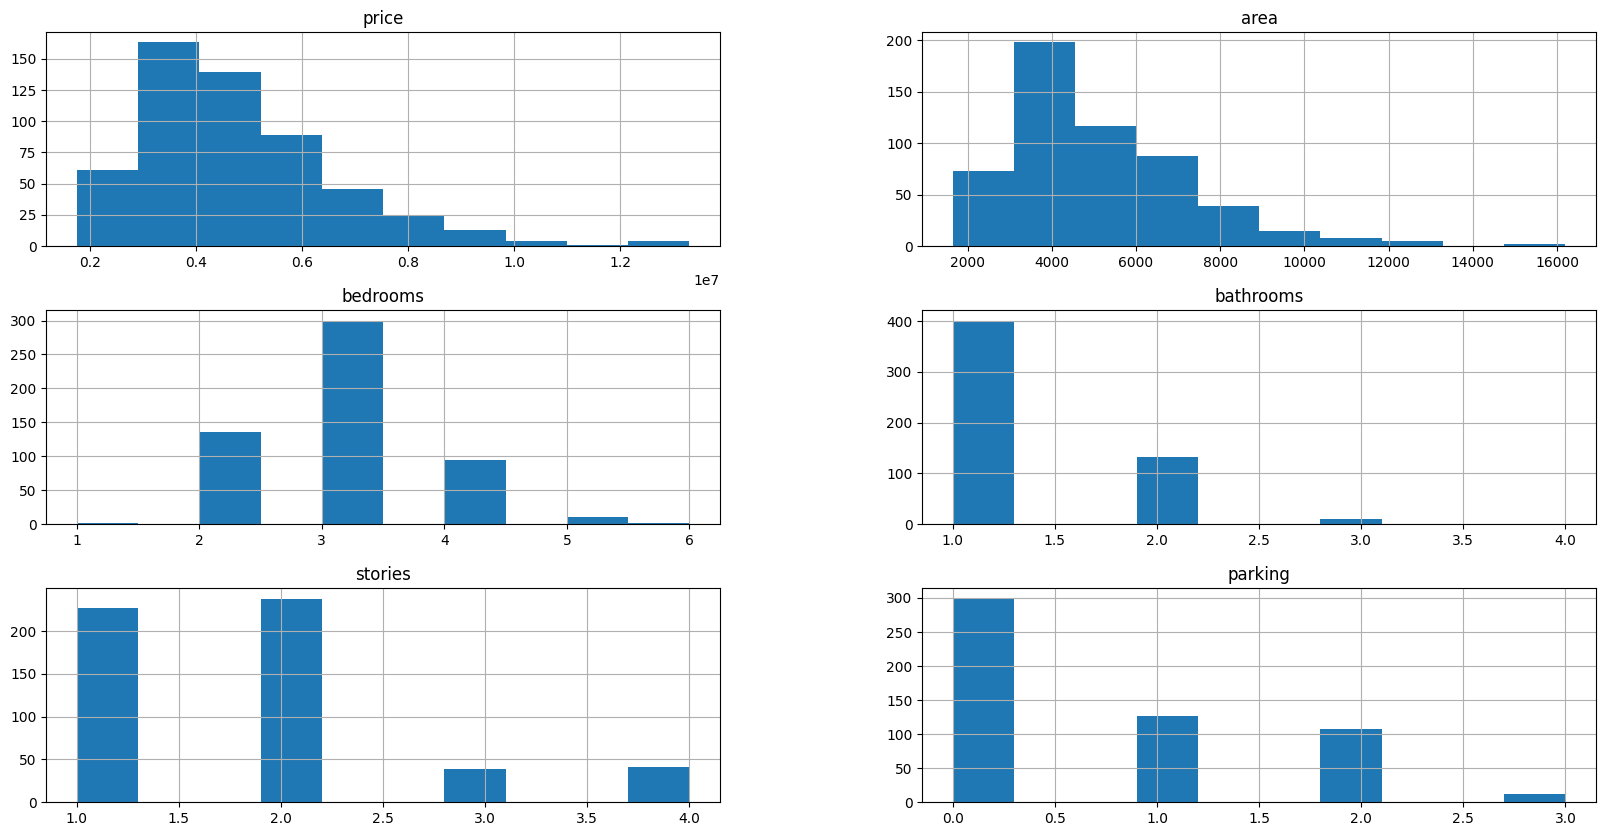

In [9]:
df.hist(figsize=(20,10))
plt.show()

In [10]:
# Calcular la asimetría (skewness) solo para columnas numéricas
numeric_columns = df.select_dtypes(include=np.number).columns
skewness = round(df[numeric_columns].skew(), 2)

# Convertir a DataFrame
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"})

# Función para clasificar la asimetría
def classify_skewness(x):
    if x['value'] < -1 or x['value'] > 1:
        return 'Muy asimétrica'
    elif -0.5 <= x['value'] <= 0.5:
        return 'Distribución simétrica'
    else:
        return 'Moderadamente asimétrica'

# Aplicar la clasificación
skewness['asimetría'] = skewness.apply(classify_skewness, axis=1)

# Mostrar resultados
skewness

,value,asimetría
price,1.21,Muy asimétrica
area,1.32,Muy asimétrica
bedrooms,0.50,Distribución simétrica
bathrooms,1.59,Muy asimétrica
stories,1.08,Muy asimétrica
parking,0.84,Moderadamente asimétrica


Se podría eliminar los datos atípicos de la variable objetivo price, no de las demás, ya que nos pueden decir información importante acerca del precio. También se podría aplicar transformaciones a la variable de area, ya que tiene asimetría.

Vamos a encodear las variables categóricas y posteriormente dividiremos en train/test y entrenar el modelo.

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use drop='first' to avoid multicollinearity

for col in df.select_dtypes(include=['object', 'category']).columns:
    # Fit and transform the column
    encoded_data = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    
    # Drop the original column and concatenate the encoded DataFrame
    df = df.drop(col, axis=1)
    df = pd.concat([df, encoded_df], axis=1)

In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [13]:
X = df.drop(columns=['price'])
y = df['price']

#Dividimos los datos en train y test para después hacer el cross validation sólo con los datos del train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [15]:
# Set seed for reproducibility
tf.random.set_seed(5465)

# Define model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=32, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Conv1D(filters=16, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

/Users/erick/Library/CloudStorage/OneDrive-ITESO/Modelos/Tarea-4/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 5, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,449 (87.69 KB)

 Trainable params: 22,225 (86.82 KB)

 Non-trainable params: 224 (896.00 B)

In [18]:
history = model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=32, 
    verbose=1
)


Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26623306891264.0000 - mae: 4840826.5000
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26623269142528.0000 - mae: 4840823.0000 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26623208325120.0000 - mae: 4840817.5000 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26623082496000.0000 - mae: 4840804.5000 
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26622816157696.0000 - mae: 4840778.5000 
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26622117806080.0000 - mae: 4840710.5000 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26620689645568.0000 - mae: 4840566.0000 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26617978028032.0000 - mae: 4840295.0000 
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26613324447744.0000 - mae: 4839836.0000 
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26606642921472.0000 - mae: 4839162.5000 


In [19]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2400662847488.0000 - mae: 1079022.8750  
Test MAE: 1087687.12


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


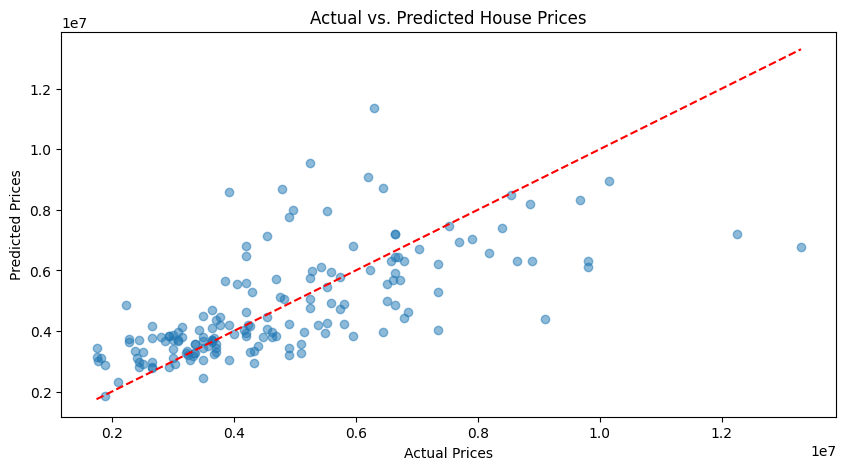

In [20]:
y_pred = model.predict(X_test)
actual_prices = y_test

plt.figure(figsize=(10, 5))
plt.scatter(actual_prices, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([actual_prices.min(), actual_prices.max()], [actual_prices.min(), actual_prices.max()], 'r--')  # Ideal line
plt.show()


Podemos ver que los resultados de nuestro modelo son malos, con un MAE de 1119847.50

Considero que este modelo no es el ideal para este tipo de problema, habría que considerar otros.

#### Consumo eléctrico

In [21]:
import os
def concatenate_timeseries(directory):
    """
    Reads all CSV files in the specified directory and concatenates them into a single DataFrame.

    Parameters:
    directory (str): The path to the directory containing the CSV files.

    Returns:
    pd.DataFrame: A concatenated DataFrame containing all the time series data.
    """
    # List to hold individual DataFrames
    dfs = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames in the list into a single DataFrame
    concatenated_df = pd.concat(dfs, ignore_index=True)

    return concatenated_df

df1 = concatenate_timeseries("data/NSW_Electricity_Price_Demand_2018-2023")

In [22]:
df1.shape

(248592, 5)

In [23]:
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/07/01 00:05:00,8656.59,396.62,TRADE
1,NSW1,2022/07/01 00:10:00,8539.53,380.41,TRADE
2,NSW1,2022/07/01 00:15:00,8591.66,380.41,TRADE
3,NSW1,2022/07/01 00:20:00,8601.76,380.41,TRADE
4,NSW1,2022/07/01 00:25:00,8518.26,371.29,TRADE


In [24]:
df1.isna().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

In [25]:
df1.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [26]:
# Convert 'SETTLEMENTDATE' to datetime and set it as the index
df1['SETTLEMENTDATE'] = pd.to_datetime(df1['SETTLEMENTDATE'], format='%Y/%m/%d %H:%M:%S')
df1.set_index('SETTLEMENTDATE', inplace=True)

# Rename 'TOTALDEMAND' to 'y'
df1.rename(columns={'TOTALDEMAND': 'y'}, inplace=True)

In [27]:
df1.drop(columns=['RRP', 'PERIODTYPE', 'REGION'], inplace=True)
df1 = df1.rename_axis('date')
df1.head()

,y
date,
2022-07-01 00:05:00,8656.59
2022-07-01 00:10:00,8539.53
2022-07-01 00:15:00,8591.66
2022-07-01 00:20:00,8601.76
2022-07-01 00:25:00,8518.26


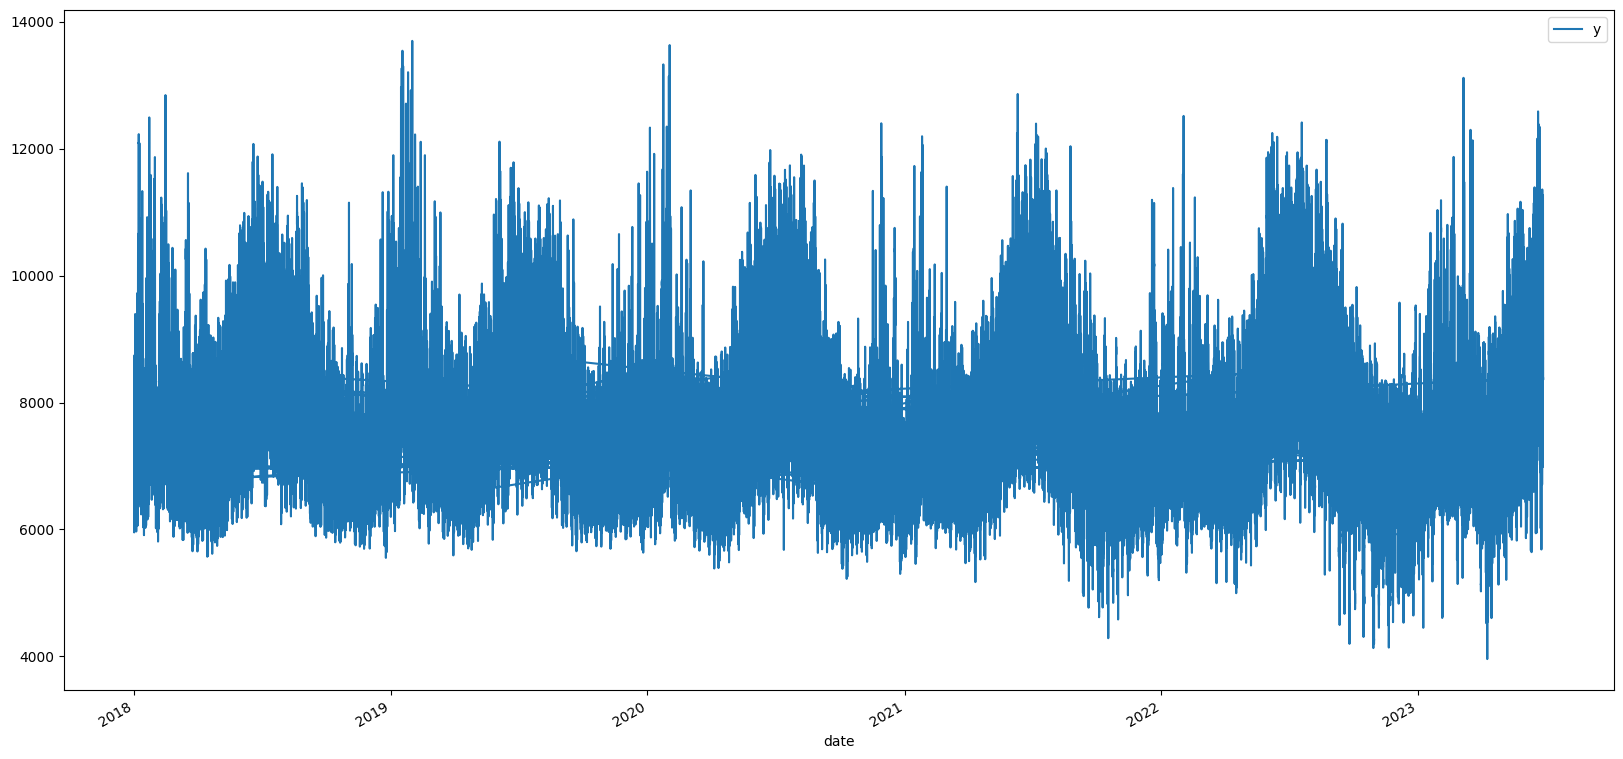

In [28]:
df1.plot(figsize=(20,10))
plt.show()

In [29]:
df1.sort_values(by='date', inplace=True)

In [30]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [31]:
# Definir parámetros
n_steps = 48
n_features = 1
X, y = split_univariate_sequence(df1['y'], n_steps)

/var/folders/_2/qz8xy45s0fv244xptjd5jqjw0000gp/T/ipykernel_44944/2044668629.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]


In [32]:
print(X.shape)
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(248544, 48)
(248544, 48, 1)


In [33]:
# Definimos nuestro modelo
model_1 = Sequential()
model_1.add(keras.layers.Input(shape=(n_steps, n_features)))
model_1.add(Conv1D(64, 2, activation='relu'))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 47, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        73,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,893 (288.64 KB)

 Trainable params: 73,893 (288.64 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [35]:
history_1 = model_1.fit(X, y, epochs=100, verbose=1)    

Epoch 1/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 397961.8438
Epoch 2/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 28055.5879
Epoch 3/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 21321.3105
Epoch 4/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 19478.1602
Epoch 5/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 18707.6504
Epoch 6/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 18096.2988
Epoch 7/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 17707.8047
Epoch 8/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 17219.3418
Epoch 9/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 16887.5195
Epoch 10/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 16729.1113
Epoch 11/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 16471.0039
Epoch 12/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 15982.1689
Epoch 13/100
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 15280.2197
Epoch 14/100
7767/7767

In [36]:
x_input = np.array(df1[-n_steps:]).reshape((1, n_steps, n_features))
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[8284.535]], dtype=float32)

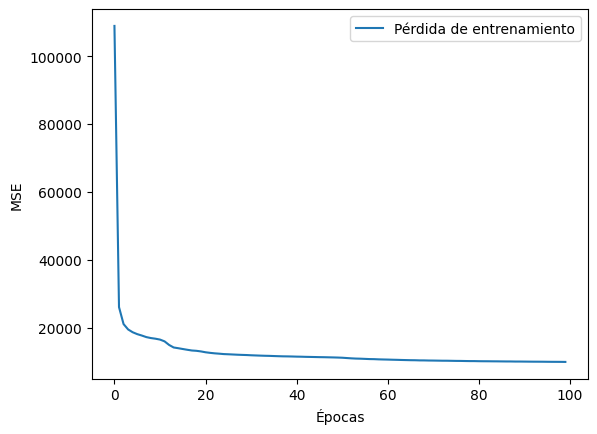

In [37]:
plt.plot(history_1.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [40]:
model_1.evaluate(X_test, y_test)

2331/2331 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - loss: 9021.5020


9597.0517578125

2331/2331 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step


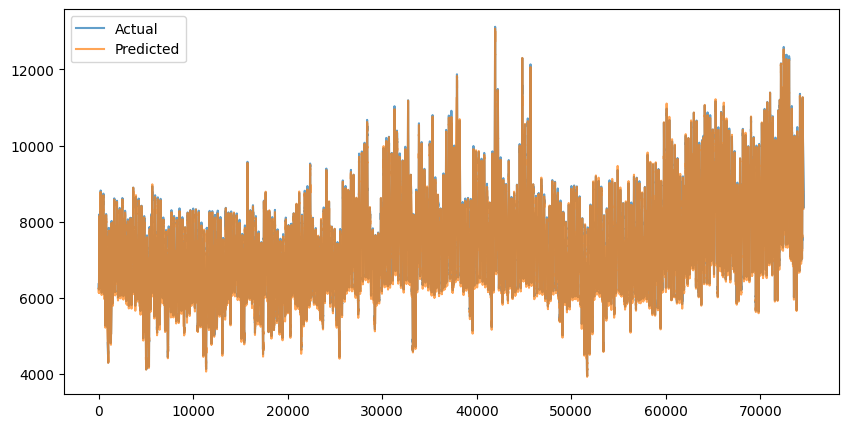

In [41]:
y_pred = model_1.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.show()

In [42]:
# Multivariado
df2 = concatenate_timeseries("data/NSW_Electricity_Price_Demand_2018-2023")

In [43]:
dem = df2['TOTALDEMAND'].values.reshape(-1, 1)
price = df2['RRP'].values.reshape(-1, 1)
output_seq = dem + price
output_seq.shape

(248592, 1)

In [44]:
dfmul = np.hstack((dem, price, output_seq))
dfmul.shape

(248592, 3)

In [45]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [46]:
n_steps = 48

X, y = split_multivariate_sequence(dfmul, n_steps)

n_features = X.shape[2]

X.shape, y.shape

((248545, 48, 2), (248545,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [50]:
# Definimos nuestro modelo
model_2 = Sequential()
model_2.add(keras.layers.Input(shape=(n_steps, n_features)))
model_2.add(Conv1D(64, 2, activation='relu'))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 47, 64)         │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │        73,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,021 (289.14 KB)

 Trainable params: 74,021 (289.14 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history2 = model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 139773.1719
Epoch 2/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 105832.5469
Epoch 3/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 96423.4688
Epoch 4/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 94820.8125
Epoch 5/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 91909.7969
Epoch 6/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 91252.1016
Epoch 7/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 90164.9922
Epoch 8/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 88907.0547
Epoch 9/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 88419.9688
Epoch 10/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 88465.6562
Epoch 11/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 87692.7656
Epoch 12/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 87920.7109
Epoch 13/100
5437/5437 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 87122.8906
Epoch 14/100
5437/5437 ━━━━━━━━━

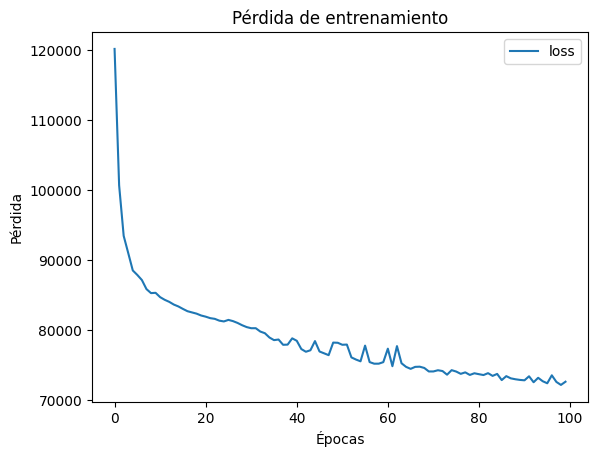

In [53]:
pd.DataFrame(history2.history).plot()
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de entrenamiento')
plt.show()

In [55]:
model_2.evaluate(X_test, y_test)

2331/2331 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - loss: 24668.7324


34099.7421875

In [56]:
# Modelo con múltiples encabezados
# Definir parámetros
from keras.layers import concatenate

n_steps = 48
n_features = 1

In [57]:
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)
# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)

model_3.compile(optimizer='adam', loss='mse')

model_3.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 48, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 48, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 47, 64)    │        192 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 47, 64)    │        192 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 23, 64)    │          0 │ conv1d_6[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 23, 64)    │          0 │ conv1d_7[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 1472)      │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 1472)      │          0 │ max_pooling1d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2944)      │          0 │ flatten_4[0][0],  │
│ (Concatenate)       │                   │            │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 50)        │    147,250 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         51 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 147,685 (576.89 KB)

 Trainable params: 147,685 (576.89 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
X[0].shape

# Separar datos de entrada
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

In [61]:
# Con estos datos podemos ajustar el modelo
history3 = model_3.fit([X1, X2], y, epochs=30, verbose=1)

Epoch 1/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 90309.1953
Epoch 2/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 84976.9766
Epoch 3/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 81711.2656
Epoch 4/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 81085.0391
Epoch 5/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 79934.6875
Epoch 6/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 79135.7734
Epoch 7/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 77860.7266
Epoch 8/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 77272.3438
Epoch 9/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 76874.8281
Epoch 10/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 76725.2031
Epoch 11/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 76329.4688
Epoch 12/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 75390.5078
Epoch 13/30
7768/7768 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 74973.3516
Epoch 14/30
7768/7768 ━━━━━━━━━━━━

In [62]:
pd.DataFrame(history3.history).plot()

<Axes: >

In [63]:
x_input = dfmul[-48:, :-1]
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))

yhat = model_3.predict([x1, x2], verbose=0)

print(f'Predicción: {yhat[0][0]}')

Predicción: 7456.10107421875


In [64]:
# Múltiples series paralelas
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [65]:
Xmsp, ymsp = split_multiple_forecasting_sequence(dfmul, n_steps=48)

In [66]:
Xmsp.shape, ymsp.shape

((248544, 48, 3), (248544, 3))

In [67]:
n_steps, Xmsp.shape[2]

(48, 3)

In [68]:
n_features = Xmsp.shape[2]

# define model_4
model_4 = Sequential()
model_4.add(keras.layers.Input(shape=(n_steps, n_features)))
model_4.add(Conv1D(64, 2, activation='relu'))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 47, 64)         │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │        73,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,251 (290.04 KB)

 Trainable params: 74,251 (290.04 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history4 = model_4.fit(Xmsp, ymsp, epochs=30, verbose=1)

Epoch 1/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 275621.5000
Epoch 2/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 68736.6328
Epoch 3/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 65622.7812
Epoch 4/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 63601.9805
Epoch 5/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 62276.6484
Epoch 6/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 61162.2812
Epoch 7/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 60040.4180
Epoch 8/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 59335.2031
Epoch 9/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 58765.9688
Epoch 10/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 58661.5664
Epoch 11/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 57417.1641
Epoch 12/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 57541.2617
Epoch 13/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 57119.0625
Epoch 14/30
7767/7767 ━━━━━━━━━━━━

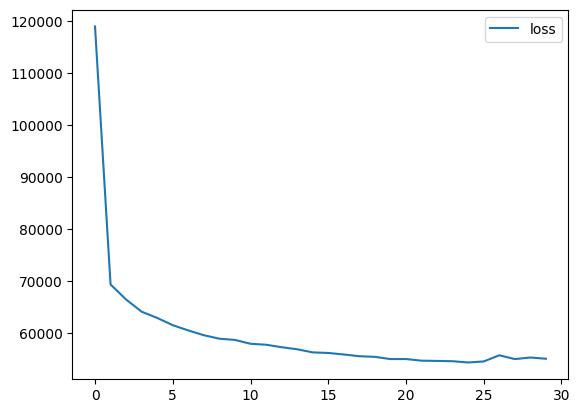

In [72]:
pd.DataFrame(history4.history).plot()
plt.show()

In [73]:
x_input = dfmul[-n_steps:, :].reshape(1, n_steps, n_features)
# Hacer la predicción
yhat = model_4.predict(x_input, verbose=0)
print(f'Predicción: {yhat}')

Predicción: [[7.3141895e+03 7.9341960e-01 7.3160947e+03]]


In [74]:
# multi-output model
n_features = Xmsp.shape[2]

visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)
output1 = Dense(1)(cnn)
output2 = Dense(1)(cnn)
output3 = Dense(1)(cnn)
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')
model_5.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 48, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 47, 64)    │        448 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 23, 64)    │          0 │ conv1d_9[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 1472)      │          0 │ max_pooling1d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 50)        │     73,650 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         51 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         51 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 1)         │         51 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,251 (290.04 KB)

 Trainable params: 74,251 (290.04 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
y1 = ymsp[:, 0].reshape((ymsp.shape[0], 1))
y2 = ymsp[:, 1].reshape((ymsp.shape[0], 1))
y3 = ymsp[:, 2].reshape((ymsp.shape[0], 1))

In [76]:
history_5 = model_5.fit(Xmsp, [y1,y2,y3], epochs=30, verbose=1)

Epoch 1/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - dense_14_loss: 229677.9062 - dense_15_loss: 98953.8203 - dense_16_loss: 552802.3125 - loss: 881433.8750
Epoch 2/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - dense_14_loss: 39219.2461 - dense_15_loss: 62146.3320 - dense_16_loss: 99617.6797 - loss: 200983.1094
Epoch 3/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - dense_14_loss: 35436.0508 - dense_15_loss: 60991.2461 - dense_16_loss: 95714.1328 - loss: 192141.5469
Epoch 4/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - dense_14_loss: 34197.2109 - dense_15_loss: 60473.7344 - dense_16_loss: 94407.1641 - loss: 189078.0938
Epoch 5/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - dense_14_loss: 33469.7500 - dense_15_loss: 60172.9062 - dense_16_loss: 94129.4297 - loss: 187772.0938
Epoch 6/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - dense_14_loss: 31976.9082 - dense_15_loss: 59880.3867 - dense_16_loss: 92367.0859 - loss: 184224.3281
Epoch 7/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11

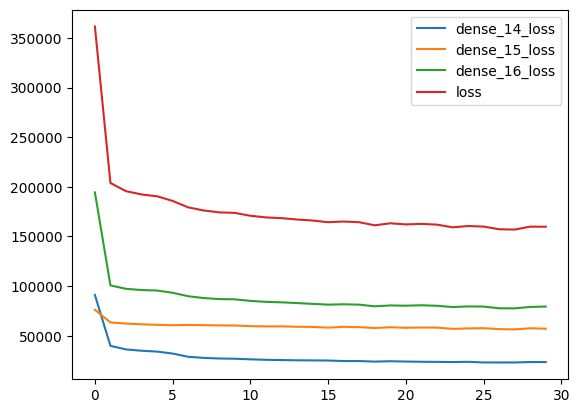

In [79]:
pd.DataFrame(history_5.history).plot()
plt.show()

In [80]:
x_input = dfmul[-n_steps:, :].reshape((1, n_steps, n_features))

yhat1, yhat2, yhat3 = model_5.predict(x_input, verbose=0)
print(f'Predicción 1: {yhat1}')
print(f'Predicción 2: {yhat2}')
print(f'Predicción 3: {yhat3}')

Predicción 1: [[7323.727]]
Predicción 2: [[5.601011]]
Predicción 3: [[7335.0615]]


In [81]:
# CNN pasos multiples
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [82]:
dfpasmul = df2['TOTALDEMAND'].values.reshape(-1, 1)
dfpasmul

array([[8656.59],
       [8539.53],
       [8591.66],
       ...,
       [7696.18],
       [7623.36],
       [7555.68]])

In [84]:
n_steps_in, n_steps_out = 48, 3
X, y = split_univariate_sequence_m_step(dfpasmul, n_steps_in, n_steps_out)

In [85]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(248542, 48, 1)

In [86]:
model_6 = Sequential()
model_6.add(keras.layers.Input(shape=(n_steps, n_features)))
model_6.add(Conv1D(64, 2, activation='relu'))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 47, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 50)             │        73,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,995 (289.04 KB)

 Trainable params: 73,995 (289.04 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
history6 = model_6.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 396212.2812
Epoch 2/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 51128.4297
Epoch 3/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 45997.5898
Epoch 4/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 43662.2930
Epoch 5/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 41678.9883
Epoch 6/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 40692.5234
Epoch 7/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 39941.9375
Epoch 8/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 39479.4141
Epoch 9/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 38212.4531
Epoch 10/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 35959.4727
Epoch 11/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 34394.1211
Epoch 12/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 33700.8125
Epoch 13/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 33168.4297
Epoch 14/30
7767/7767 ━━━━━━━━━━━

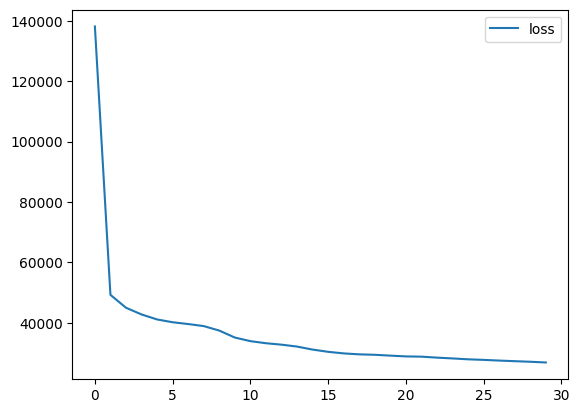

In [88]:
pd.DataFrame(history6.history).plot()
plt.show()

In [89]:
x_input = X[-1].reshape((1, n_steps, n_features))

yhat = model_6.predict(x_input, verbose=0)

print("Predicción:", yhat)

Predicción: [[7561.784  7468.9946 7357.6196]]


In [90]:
# Serie temporal multivariada
def split_multivariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()

    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        if out_end_ix > len(sequence):
            break

        # Asegurar que seq_x y seq_y sean matrices de 2D
        seq_x = sequence[i:end_ix, :]
        seq_y = sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [91]:
dfpasmul2 = df2['TOTALDEMAND'].values.reshape(-1, 1)
dfpasmul2.shape

(248592, 1)

In [92]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 48, 3

X, y = split_multivariate_sequence_m_step(dfpasmul2, n_steps_in, n_steps_out)

In [93]:
n_features = X.shape[2]

# Definir el modelo
model_7 = Sequential()
model_7.add(keras.layers.Input(shape=(n_steps, n_features)))
model_7.add(Conv1D(64, 2, activation='relu'))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model_7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 47, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │        73,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,995 (289.04 KB)

 Trainable params: 73,995 (289.04 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# fit model_7
model_7.fit(X, y, epochs=30, verbose=1)

model_7.summary()

Epoch 1/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 400262.4688
Epoch 2/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 43744.9688
Epoch 3/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 39884.2578
Epoch 4/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 37501.7539
Epoch 5/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 35752.8984
Epoch 6/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 33523.5000
Epoch 7/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 32213.8730
Epoch 8/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 31155.4512
Epoch 9/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 30242.5352
Epoch 10/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 29454.1230
Epoch 11/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 28566.3594
Epoch 12/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 28089.3867
Epoch 13/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 27522.8574
Epoch 14/30
7767/7767 ━━━━━━━━━━━━━━

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 47, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │        73,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,987 (867.14 KB)

 Trainable params: 73,995 (289.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 147,992 (578.10 KB)

In [95]:
x_input = dfpasmul2[-n_steps:].reshape(1, n_steps, n_features)

y_pred = model_7.predict(x_input, verbose=0)

print("Predicción:", y_pred)

Predicción: [[7108.1396 6854.277  6615.2666]]


In [96]:
# Serie temporal multivariada predicción múltiple de cada entrada
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [97]:
dfmul2 = dfmul.copy()
dfmul2.shape

(248592, 3)

In [98]:
n_steps_in, n_steps_out = 48, 3

X, y = split_multivariate_sequence_m_step_parallel(dfmul2, n_steps_in, n_steps_out)

In [99]:
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
y.shape

(248542, 9)

In [100]:
n_features = X.shape[2]

# Definimos nuestro modelo
model_8 = Sequential()
model_8.add(keras.layers.Input(shape=(n_steps, n_features)))
model_8.add(Conv1D(64, 2, activation='relu'))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_output))
model_8.compile(optimizer='adam', loss='mse')
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 47, 64)         │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 50)             │        73,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,557 (291.24 KB)

 Trainable params: 74,557 (291.24 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
# fit model_8
history_8 = model_8.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 366920.0312
Epoch 2/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 81325.2578
Epoch 3/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 77095.2578
Epoch 4/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 75234.7578
Epoch 5/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 74176.1484
Epoch 6/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 73600.4688
Epoch 7/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 70882.6875
Epoch 8/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 68869.8281
Epoch 9/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 67960.3750
Epoch 10/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 67252.7734
Epoch 11/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 66796.6641
Epoch 12/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 66651.0156
Epoch 13/30
7767/7767 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 66311.1172
Epoch 14/30
7767/7767 ━━━━━━━━━━━━

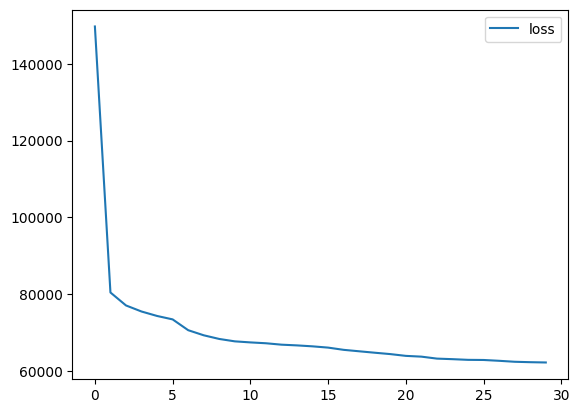

In [102]:
pd.DataFrame(history_8.history).plot()
plt.show()

In [103]:
x_input = dfmul2[-n_steps_in:].reshape(1, n_steps_in, n_features)

y_pred = model_8.predict(x_input, verbose=0)

y_pred_reshaped = y_pred.reshape(n_steps_out, n_features)

print("Predicción original:", y_pred)
print("Predicción reshaped:", y_pred_reshaped)

Predicción original: [[ 7.2049731e+03 -1.3278687e+00  7.2055503e+03  7.0193062e+03
   6.5458469e+00  7.0236025e+03  6.8275752e+03 -4.6055450e+00
   6.8239883e+03]]
Predicción reshaped: [[ 7.2049731e+03 -1.3278687e+00  7.2055503e+03]
 [ 7.0193062e+03  6.5458469e+00  7.0236025e+03]
 [ 6.8275752e+03 -4.6055450e+00  6.8239883e+03]]


Conclusiones

Parece ser que el modelo de Serie temporal multivariada, el 7, fue el que mejor desempeño tuvo, por su menor loss, sin embargo, hace falta probar este modelo y validarlo para asegurarnos que fue el mejor de todos. Igualmente para mejorar los resultados se pudo haber escalado las X, ya que las redes neuronales se benefician del escalamiento previo.

Código de solución estudiante 2

Carlos Alberto Moreno Labrador

Primeras filas del dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None


Estadísticas descriptivas:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN



=== Estructura del modelo (Estudiante 2) ===


/Users/carlosmoreno/.pyenv/versions/3.10.12/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,801 (96.88 KB)

 Trainable params: 24,801 (96.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0743 - val_loss: 0.0162
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0253 - val_loss: 0.0152
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 - val_loss: 0.0150
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - val_loss: 0.0148
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 - val_loss: 0.0154
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 - val_loss: 0.0140
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119 - val_loss: 0.0134
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - val_loss: 0.0159
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - val_loss: 0.0137
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - val_loss: 0.0160


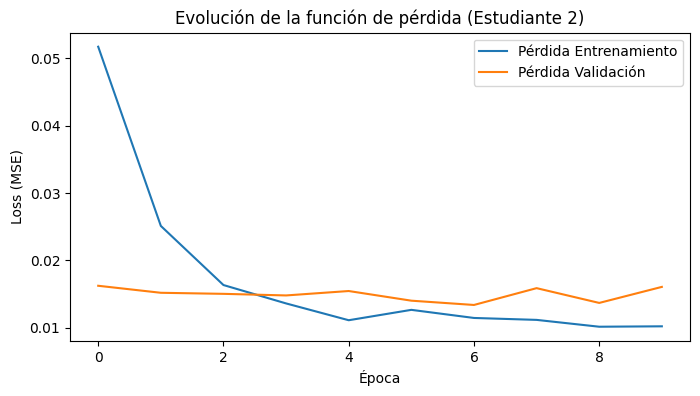


MSE en el conjunto de prueba: 0.0160
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Comparación de 5 muestras (Predicción vs. Real) - Estudiante 2:

Pred: 4626327.00 | Real: 4060000.00
Pred: 6835269.50 | Real: 6650000.00
Pred: 2628689.00 | Real: 3710000.00
Pred: 4091202.75 | Real: 6440000.00
Pred: 3042789.00 | Real: 2800000.00

Modelo de Estudiante 2 completado.


In [3]:
### Código de solución estudiante 2

# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import SGD

# -------------------------------------------------------------------
# 1. LECTURA DEL CONJUNTO DE DATOS
# -------------------------------------------------------------------
try:
    df = pd.read_csv("housing.csv")
except:
    print("No se encontró 'housing.csv'; se creará un dataframe de ejemplo.")
    df = pd.DataFrame({
        'price': np.random.randint(1_750_000, 13_300_000, size=100),
        'area': np.random.randint(1650, 16200, size=100),
        'bedrooms': np.random.randint(1, 7, size=100),
        'bathrooms': np.random.randint(1, 5, size=100),
        'stories': np.random.randint(1, 5, size=100),
        'mainroad': np.random.choice(['yes','no'], 100),
        'guestroom': np.random.choice(['yes','no'], 100),
        'basement': np.random.choice(['yes','no'], 100),
        'hotwaterheating': np.random.choice(['yes','no'], 100),
        'airconditioning': np.random.choice(['yes','no'], 100),
        'parking': np.random.randint(0, 4, size=100),
        'prefarea': np.random.choice(['yes','no'], 100),
        'furnishingstatus': np.random.choice(['furnished','semi-furnished','unfurnished'], 100)
    })

print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

# -------------------------------------------------------------------
# 2. MANEJO DE CATEGORÍAS
# -------------------------------------------------------------------
# Identificamos columnas categóricas (tipo object)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Pasamos a One-Hot Encoding con get_dummies (eliminando la primera categoría para evitar multicolinealidad)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# -------------------------------------------------------------------
# 3. SEPARACIÓN DE VARIABLES (X, y)
# -------------------------------------------------------------------
target_col = 'price'
X = df.drop(target_col, axis=1)
y = df[target_col].values

# -------------------------------------------------------------------
# 4. ESCALADO DE COLUMNAS NUMÉRICAS
# -------------------------------------------------------------------
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_reshaped = y.reshape(-1, 1)
y_scaled = scaler_y.fit_transform(y_reshaped)

# -------------------------------------------------------------------
# 5. SEPARACIÓN EN ENTRENAMIENTO Y TEST
# -------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_scaled, 
    test_size=0.2, 
    random_state=42
)

# -------------------------------------------------------------------
# 6. ADAPTACIÓN PARA Conv1D
# -------------------------------------------------------------------
# Conv1D requiere un tensor con forma (muestras, secuencia, canales)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# -------------------------------------------------------------------
# 7. CONSTRUCCIÓN DE LA CNN
# -------------------------------------------------------------------
model_2 = Sequential()

# Capa de entrada (opcional) + Conv1D
model_2.add(InputLayer(input_shape=(X_train.shape[1], 1)))
model_2.add(Conv1D(filters=32, kernel_size=2, activation='tanh'))

model_2.add(Flatten())

model_2.add(Dense(64, activation='tanh'))

model_2.add(Dropout(0.2))  # Evitar sobreajuste

model_2.add(Dense(1, activation='linear'))  # Salida para regresión

# Optimizer 'sgd' (en vez de 'adam') + pérdida 'mse'
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_2.compile(optimizer=optimizer, loss='mse')

print("\n=== Estructura del modelo (Estudiante 2) ===")
model_2.summary()

# -------------------------------------------------------------------
# 8. ENTRENAMIENTO DEL MODELO
# -------------------------------------------------------------------
epochs = 10  # Ajustar según necesidades
history = model_2.fit(
    X_train_cnn, 
    y_train, 
    validation_data=(X_test_cnn, y_test),
    epochs=epochs,
    batch_size=16,
    verbose=1
)

# -------------------------------------------------------------------
# 9. GRÁFICAS DE ENTRENAMIENTO
# -------------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Evolución de la función de pérdida (Estudiante 2)')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# -------------------------------------------------------------------
# 10. EVALUACIÓN DEL MODELO
# -------------------------------------------------------------------
mse_test = model_2.evaluate(X_test_cnn, y_test, verbose=0)
print(f"\nMSE en el conjunto de prueba: {mse_test:.4f}")

predictions = model_2.predict(X_test_cnn)
predictions_descaled = scaler_y.inverse_transform(predictions)
y_test_descaled      = scaler_y.inverse_transform(y_test)

# -------------------------------------------------------------------
# 11. COMPARACIÓN PREDICCIÓN VS REAL
# -------------------------------------------------------------------
n_samples_to_show = 5
print(f"\nComparación de {n_samples_to_show} muestras (Predicción vs. Real) - Estudiante 2:\n")
for i in range(n_samples_to_show):
    print(f"Pred: {predictions_descaled[i][0]:.2f} | Real: {y_test_descaled[i][0]:.2f}")

print("\nModelo de Estudiante 2 completado.")
